# **Data cleaning and preprocessing**

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True) 

## Import Dataset

In [2]:
turkey_daily_climate = pd.read_csv("turkey_daily_climate_data_2010_2015.csv",keep_default_na=False,na_values=['N/A*'])

| City                                      | City name from Turkey                                                  |
|-------------------------------------------|------------------------------------------------------------------------|
| **Year**                                      | Year of the record                                                     |
| **Month**                                     | Month of the record                                                    |
| **Day**                                       | Day of the record                                                      |
| **Temperature avarage, Fahrenheit / Celsius** | The average temperature of the daily record in Fahrenheit and Celcius  |
| **Temperature maximum, Fahrenheit / Celsius** | The maximum temperature of the daily record in Fahrenheit and Celcius  |
| **Temperature minimum, Fahrenheit / Celsius** | The minimum temperature of the daily record in Fahrenheit and Celcius  |
| **Precipitation in / cm**                     | The precipitation of the daily record in cantimeter                    |
| **Average daily wind speed (miles/hour)**     | The average wind of the daily record in miles and hours                |
| **Visibility in miles**                       | The visibility in miles of the daily record                            |
| **Dew point, Fahrenheit / Celsius**           | The dew point of the daily record in Fahrenheit and Celcius            |
| **Maximum sustained wind speed (miles/hour)** | The maximum sustained wind speed of the daily record in miles and hour |
| **Maximum wind gust reported for the day**    | The maximum wind gust of the daily record                              |
| **Sea level pressure in mBARs**               | The sea level of the daily record in mBARs                             |
| **Station pressure in mBARs**                 | Station pressure of the daily record in mBARs                          |
| **Snow depth in inches**                      | The snow depth of the daily record in inches                           |
| **Weather type**                              | The wheather type                                                      |
                                      

In [3]:
turkey_daily_climate.head(3)

,Unnamed: 0,City,Year,Month,Day,"Temperature avarage, Fahrenheit / Celsius","Temperature maximum, Fahrenheit / Celsius","Temperature minimum, Fahrenheit / Celsius",Precipitation in / cm,Average daily wind speed (miles/hour),Visibility in miles,"Dew point, Fahrenheit / Celsius",Maximum sustained wind speed (miles/hour),Maximum wind gust reported for the day,Sea level pressure in mBARs,Station pressure in mBARs,Snow depth in inches,Weather type
0,0,Adana,2010,"01,02",1,57.0/13.9,66.2/19.0,44.6/7.0,NaN,3.80,6.0,47.8/8.8,10.24,NaN,NaN,NaN,NaN,NaN
1,1,Adana,2010,"01,02",2,59.2/15.1,66.2/19.0,51.8/11.0,NaN,4.60,6.0,53.2/11.8,16.11,NaN,NaN,NaN,NaN,Rain/Drizzle
2,2,Adana,2010,"01,02",3,60.7/15.9,68.0/20.0,53.6/12.0,NaN,7.25,5.0,42.8/6.0,16.11,NaN,NaN,NaN,NaN,Rain/Drizzle


## Descriptive statistics of data

In [4]:
turkey_daily_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139460 entries, 0 to 139459
Data columns (total 18 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Unnamed: 0                                 139460 non-null  int64  
 1   City                                       139460 non-null  object 
 2   Year                                       139460 non-null  int64  
 3   Month                                      139460 non-null  object 
 4   Day                                        139460 non-null  int64  
 5   Temperature avarage, Fahrenheit / Celsius  139460 non-null  object 
 6   Temperature maximum, Fahrenheit / Celsius  139460 non-null  object 
 7   Temperature minimum, Fahrenheit / Celsius  139460 non-null  object 
 8   Precipitation in / cm                      62396 non-null   object 
 9   Average daily wind speed (miles/hour)      133760 non-null  float64
 10  Visibili

In [5]:
turkey_daily_climate["Average daily wind speed (miles/hour)"] = pd.to_numeric(turkey_daily_climate["Average daily wind speed (miles/hour)"])
turkey_daily_climate["Visibility in miles"] = pd.to_numeric(turkey_daily_climate["Visibility in miles"])
turkey_daily_climate["Maximum sustained wind speed (miles/hour)"] = pd.to_numeric(turkey_daily_climate["Maximum sustained wind speed (miles/hour)"])
turkey_daily_climate["Maximum wind gust reported for the day"] = pd.to_numeric(turkey_daily_climate["Maximum wind gust reported for the day"])

In [6]:
# Drop unnecessary columns
turkey_daily_climate.drop(columns = ['Unnamed: 0','Sea level pressure in mBARs', 'Station pressure in mBARs', 'Snow depth in inches'], inplace = True)

In [7]:
turkey_daily_climate.head(2)

,City,Year,Month,Day,"Temperature avarage, Fahrenheit / Celsius","Temperature maximum, Fahrenheit / Celsius","Temperature minimum, Fahrenheit / Celsius",Precipitation in / cm,Average daily wind speed (miles/hour),Visibility in miles,"Dew point, Fahrenheit / Celsius",Maximum sustained wind speed (miles/hour),Maximum wind gust reported for the day,Weather type
0,Adana,2010,"01,02",1,57.0/13.9,66.2/19.0,44.6/7.0,NaN,3.8,6.0,47.8/8.8,10.24,NaN,NaN
1,Adana,2010,"01,02",2,59.2/15.1,66.2/19.0,51.8/11.0,NaN,4.6,6.0,53.2/11.8,16.11,NaN,Rain/Drizzle


In [8]:
turkey_daily_climate.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,139460.0,2012.498960,1.707425,2010.00,2011.00,2012.00,2014.00,2015.00
Day,139460.0,15.821691,8.845933,1.00,8.00,16.00,23.00,31.00
Average daily wind speed (miles/hour),133760.0,5.628625,2.034685,1.61,4.37,5.41,6.33,18.87
Visibility in miles,133608.0,5.708191,1.133651,1.00,5.00,6.00,6.00,7.00
Maximum sustained wind speed (miles/hour),133760.0,13.137761,3.770573,4.72,10.24,12.77,14.96,32.22
Maximum wind gust reported for the day,5244.0,29.880000,7.439626,16.11,24.17,29.92,34.41,52.94


In [9]:
# Check duplicated
turkey_daily_climate.duplicated().sum()

0

In [10]:
# Check missing values
turkey_daily_climate.isnull().sum()

City                                              0
Year                                              0
Month                                             0
Day                                               0
Temperature avarage, Fahrenheit / Celsius         0
Temperature maximum, Fahrenheit / Celsius         0
Temperature minimum, Fahrenheit / Celsius         0
Precipitation in / cm                         77064
Average daily wind speed (miles/hour)          5700
Visibility in miles                            5852
Dew point, Fahrenheit / Celsius                   0
Maximum sustained wind speed (miles/hour)      5700
Maximum wind gust reported for the day       134216
Weather type                                 110732
dtype: int64

*Observing columns one by one*

**City**

In [11]:
turkey_daily_climate.City.unique()

array(['Adana', 'Adiyaman', 'Afyonkarahisar', 'Agri', 'Amasya',
       'Ankara/Central', 'Antalya', 'Artvin', 'Aydin', 'Balikesir',
       'Bilecik', 'Bingol', 'Bolu', 'Burdur', 'Bursa', 'Canakkale',
       'Cankiri', 'Corum', 'Denizli', 'Diyarbakir', 'Edirne', 'Elazig',
       'Erzincan', 'Erzurum', 'Eskisehir', 'Gap', 'Sanliurfa', 'Giresun',
       'Gumushane', 'Hakkari', 'Hatay', 'Isparta', 'Istanbul', 'Mersin',
       'Izmir', 'Kars', 'Kastamonu', 'Kayseri', 'Kirklareli', 'Kirsehir',
       'Kocaeli', 'Konya', 'Kutahya', 'Malatya', 'Manisa',
       'Kahramanmaras', 'Mardin', 'Mugla', 'Mus', 'Nevsehir', 'Nigde',
       'Ordu', 'Rize', 'Sakarya', 'Samsun', 'Siirt', 'Sinop', 'Sivas',
       'Tekirdag', 'Tokat', 'Trabzon', 'Tunceli', 'Usak', 'Van', 'Yozgat',
       'Zonguldak', 'Bayburt', 'Kirikkale', 'Batman'], dtype=object)

In [12]:
len(turkey_daily_climate.City.unique())

69

*There are 69 different cities.*

In [13]:
city_map = {"City" : {'Ankara/Central':'Ankara'}}
turkey_daily_climate = turkey_daily_climate.replace(city_map)

**Year**

In [14]:
pd.DataFrame(turkey_daily_climate.Year.value_counts())

,Year
2010,23253
2011,23253
2012,23253
2013,23253
2014,23253
2015,23195


**Month**

In [15]:
turkey_daily_climate.Month.unique()

array(['01,02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

*We will seperate 01 and 02*

In [16]:
turkey_daily_climate['Month'] = turkey_daily_climate['Month'].str.split(',').str[0]

In [17]:
turkey_daily_climate.Month.unique()

array(['01', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'],
      dtype=object)

In [18]:
adjust_df = turkey_daily_climate[turkey_daily_climate['Month'] == '01']
adjust_df['Month'] = adjust_df['Month'].replace(['01'],'02')
frames = [turkey_daily_climate, adjust_df]
turkey_daily_climate = pd.concat(frames, ignore_index = True)

C:\Users\Hale Afra İRİŞ\AppData\Local\Temp\ipykernel_13284\4255666511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adjust_df['Month'] = adjust_df['Month'].replace(['01'],'02')


In [19]:
turkey_daily_climate.Month.unique()

array(['01', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '02'], dtype=object)

**Date**

In [20]:
turkey_daily_climate.Day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

*We create date column using 'Day', 'Month' and 'Year' columns.*

In [21]:
turkey_daily_climate['Day'] = turkey_daily_climate['Day'].astype(str)
day_map = {"Day" : {'1':'01', '2':'02', '3':'03', '4':'04', '5':'05', '6':'06', '7':'07', '8':'08', '9':'09'}}
turkey_daily_climate = turkey_daily_climate.replace(day_map)
turkey_daily_climate['Date'] = turkey_daily_climate['Year'].astype(str) + '-' + turkey_daily_climate['Month'].astype(str) + '-' + turkey_daily_climate['Day']

In [22]:
turkey_daily_climate.Date

0         2010-01-01
1         2010-01-02
2         2010-01-03
3         2010-01-04
4         2010-01-05
             ...    
152289    2015-02-27
152290    2015-02-28
152291    2015-02-29
152292    2015-02-30
152293    2015-02-31
Name: Date, Length: 152294, dtype: object

**Temperature avarage, Fahrenheit / Celsius**

*There are two temperature average values which is Fahrenheit and Celsius. We will select Celsius and delete the Fahrenheit.*

In [23]:
turkey_daily_climate['Temperature avarage, Fahrenheit / Celsius']
turkey_daily_climate['TempAvgCel'] = turkey_daily_climate['Temperature avarage, Fahrenheit / Celsius'].str.split('/').str[1]
turkey_daily_climate[['Temperature avarage, Fahrenheit / Celsius', 'TempAvgCel']].head(5)

,"Temperature avarage, Fahrenheit / Celsius",TempAvgCel
0,57.0/13.9,13.9
1,59.2/15.1,15.1
2,60.7/15.9,15.9
3,57.3/14.1,14.1
4,55.0/12.8,12.8


In [24]:
# Dropping 'Temperature avarage, Fahrenheit / Celsius' column
turkey_daily_climate.drop(columns = ['Temperature avarage, Fahrenheit / Celsius'], inplace = True)
turkey_daily_climate['TempAvgCel'] = turkey_daily_climate['TempAvgCel'].astype(float) 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


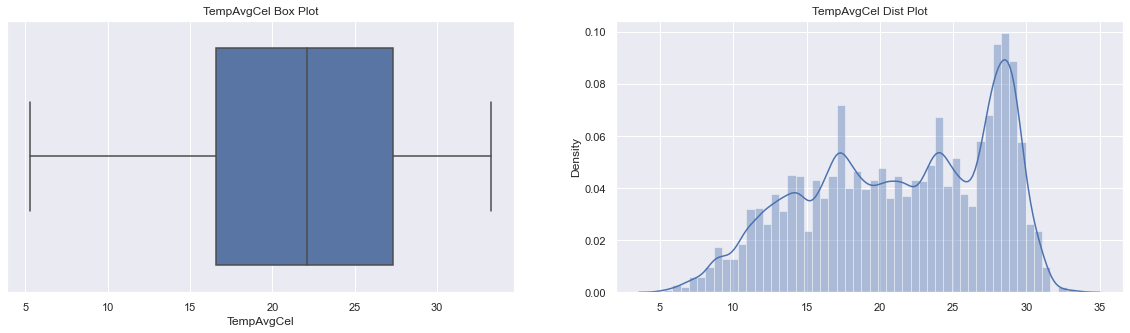

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=False)
# fig.suptitle('Box & Distribution Plots')

# Box Plot
sns.boxplot(ax=axes[0], x = turkey_daily_climate.TempAvgCel)
axes[0].set_title('TempAvgCel Box Plot')

# Distribution Plot
sns.distplot(ax=axes[1], x = turkey_daily_climate.TempAvgCel)
axes[1].set_title('TempAvgCel Dist Plot')

plt.show()

**Temperature maximum, Fahrenheit / Celsius**

*There are two temperature maximum values which is Fahrenheit and Celsius. We will select Celsius and delete the Fahrenheit.*

In [26]:
turkey_daily_climate['Temperature maximum, Fahrenheit / Celsius']

0         66.2/19.0
1         66.2/19.0
2         68.0/20.0
3         66.2/19.0
4         59.0/15.0
            ...    
152289    65.1/18.4
152290    68.5/20.3
152291    74.7/23.7
152292    80.6/27.0
152293    86.4/30.2
Name: Temperature maximum, Fahrenheit / Celsius, Length: 152294, dtype: object

In [27]:
turkey_daily_climate['TempMaxCel'] = turkey_daily_climate['Temperature maximum, Fahrenheit / Celsius'].str.split('/').str[1]
turkey_daily_climate[['Temperature maximum, Fahrenheit / Celsius', 'TempMaxCel']].head(3)

,"Temperature maximum, Fahrenheit / Celsius",TempMaxCel
0,66.2/19.0,19.0
1,66.2/19.0,19.0
2,68.0/20.0,20.0


In [28]:
# Dropping 'Temperature maximum, Fahrenheit / Celsius' column
turkey_daily_climate.drop(columns = ['Temperature maximum, Fahrenheit / Celsius'], inplace = True)
turkey_daily_climate['TempMaxCel'] = turkey_daily_climate['TempMaxCel'].astype(float) 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


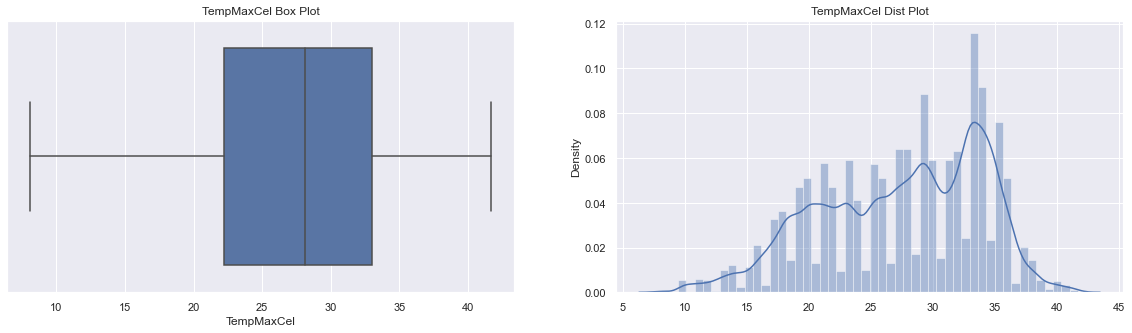

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=False)
# fig.suptitle('Box & Distribution Plots')

# Box Plot
sns.boxplot(ax=axes[0], x = turkey_daily_climate.TempMaxCel)
axes[0].set_title('TempMaxCel Box Plot')

# Distribution Plot
sns.distplot(ax=axes[1], x = turkey_daily_climate.TempMaxCel)
axes[1].set_title('TempMaxCel Dist Plot')

plt.show()

**Temperature minimum, Fahrenheit / Celsius**

*There are two temperature minimum values which is Fahrenheit and Celsius. We will select Celsius and delete the Fahrenheit.*

In [30]:
turkey_daily_climate['Temperature minimum, Fahrenheit / Celsius']

0          44.6/7.0
1         51.8/11.0
2         53.6/12.0
3          46.4/8.0
4         51.8/11.0
            ...    
152289     46.4/8.0
152290     46.6/8.1
152291     47.1/8.4
152292    50.0/10.0
152293    52.9/11.6
Name: Temperature minimum, Fahrenheit / Celsius, Length: 152294, dtype: object

In [31]:
turkey_daily_climate['TempMinCel'] = turkey_daily_climate['Temperature minimum, Fahrenheit / Celsius'].str.split('/').str[1]
turkey_daily_climate[['Temperature minimum, Fahrenheit / Celsius', 'TempMinCel']].head(3)

,"Temperature minimum, Fahrenheit / Celsius",TempMinCel
0,44.6/7.0,7.0
1,51.8/11.0,11.0
2,53.6/12.0,12.0


In [32]:
turkey_daily_climate.drop(columns = ['Temperature minimum, Fahrenheit / Celsius'], inplace = True)
turkey_daily_climate['TempMinCel'] = turkey_daily_climate['TempMinCel'].astype(float) 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


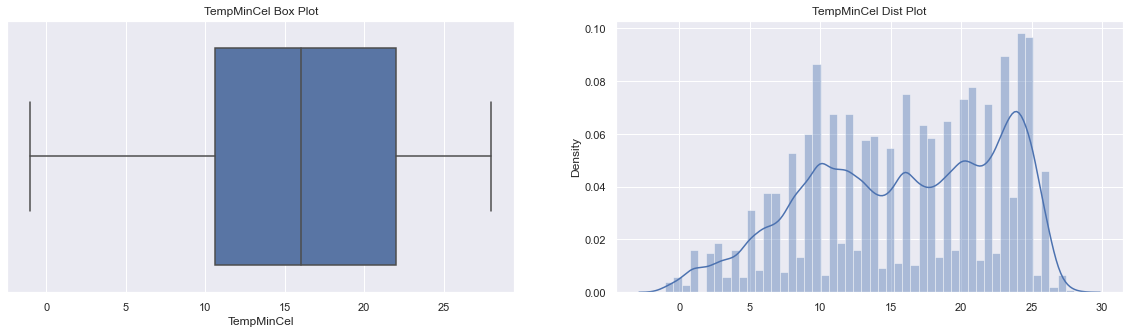

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=False)
# fig.suptitle('Box & Distribution Plots')

# Box Plot
sns.boxplot(ax=axes[0], x = turkey_daily_climate.TempMinCel)
axes[0].set_title('TempMinCel Box Plot')

# Distribution Plot
sns.distplot(ax=axes[1], x = turkey_daily_climate.TempMinCel)
axes[1].set_title('TempMinCel Dist Plot')

plt.show()

**Precipitation in / cm**

In [34]:
turkey_daily_climate['Precipitation in / cm'].unique()

array([nan, '0.00/0.00', '0.01/0.03', '0.02/0.05', '0.16/0.41',
       '0.79/2.01', '0.20/0.51', '0.31/0.79', '0.08/0.20', '0.09/0.23',
       '1.61/4.09', '0.10/0.25', '0.28/0.71', '0.13/0.33', '0.21/0.53',
       '0.46/1.17', '0.17/0.43', '0.77/1.96', '0.03/0.08', '0.06/0.15',
       '0.11/0.28', '0.07/0.18', '0.04/0.10', '0.12/0.30', '0.24/0.61',
       '0.43/1.09', '0.34/0.86', '1.26/3.20', '0.66/1.68', '0.95/2.41',
       '3.15/8.00', '0.05/0.13', '0.39/0.99', '1.14/2.90', '0.69/1.75',
       '0.70/1.78', '0.54/1.37', '0.63/1.60', '0.85/2.16', '0.32/0.81',
       '0.51/1.30', '1.36/3.45', '0.27/0.69', '1.13/2.87', '0.19/0.48',
       '1.17/2.97', '0.88/2.24', '0.72/1.83', '0.76/1.93', '0.35/0.89',
       '1.85/4.70', '0.40/1.02', '0.18/0.46'], dtype=object)

*There are two precipitation values which is inch and centimeter. We will select cm and delete the in.*

In [35]:
turkey_daily_climate['PrecipitationCm'] = turkey_daily_climate['Precipitation in / cm'].str.split('/').str[1]
turkey_daily_climate[['Precipitation in / cm', 'PrecipitationCm']].sample(3)

,Precipitation in / cm,PrecipitationCm
775,NaN,NaN
127352,NaN,NaN
102699,0.00/0.00,0.00


In [36]:
turkey_daily_climate.drop(columns = ['Precipitation in / cm'], inplace = True)
turkey_daily_climate['PrecipitationCm'] = turkey_daily_climate['PrecipitationCm'].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


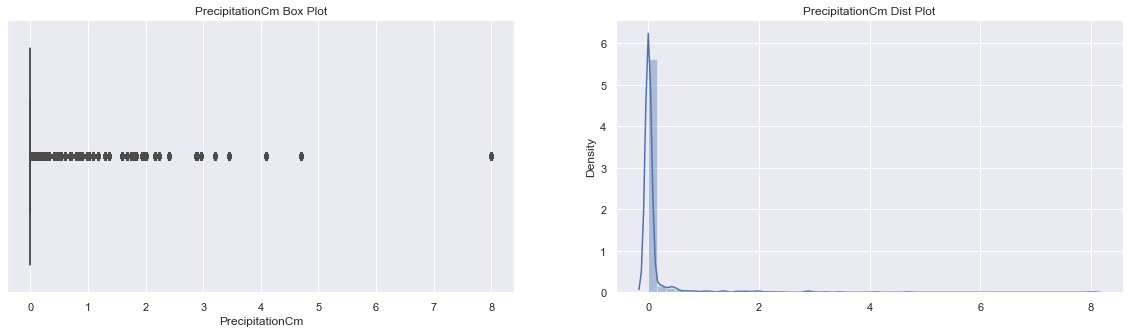

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=False)
# fig.suptitle('Box & Distribution Plots')

# Box Plot
sns.boxplot(ax=axes[0], x = turkey_daily_climate.PrecipitationCm)
axes[0].set_title('PrecipitationCm Box Plot')

# Distribution Plot
sns.distplot(ax=axes[1], x = turkey_daily_climate.PrecipitationCm)
axes[1].set_title('PrecipitationCm Dist Plot')

plt.show()

In [38]:
# Observing unique values
turkey_daily_climate['PrecipitationCm'].unique()

array([ nan, 0.  , 0.03, 0.05, 0.41, 2.01, 0.51, 0.79, 0.2 , 0.23, 4.09,
       0.25, 0.71, 0.33, 0.53, 1.17, 0.43, 1.96, 0.08, 0.15, 0.28, 0.18,
       0.1 , 0.3 , 0.61, 1.09, 0.86, 3.2 , 1.68, 2.41, 8.  , 0.13, 0.99,
       2.9 , 1.75, 1.78, 1.37, 1.6 , 2.16, 0.81, 1.3 , 3.45, 0.69, 2.87,
       0.48, 2.97, 2.24, 1.83, 1.93, 0.89, 4.7 , 1.02, 0.46])

In [39]:
turkey_daily_climate['PrecipitationCm'].isnull().sum()

84145

*Using 'Weather Type' and 'City' columns, fill Precipitation missing values.*

<AxesSubplot:>

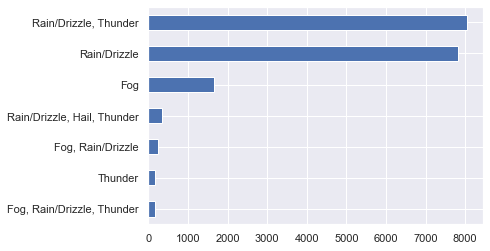

In [40]:
turkey_daily_climate[turkey_daily_climate.PrecipitationCm.isnull() == True].iloc[:,9].value_counts().sort_values().plot(kind = 'barh')

*We create dictionaries such that:*  
    *For example:*  
    *A row --> Precipitation is missing , City = Ankara, Weather Type = Fog*  
    *Then we group rows Precipitation is not missing , City = Ankara, Weather Type = Fog then getting median of Precipitation.*  
    *Then insert the median value to missing row.*

In [41]:
dict_1 = dict(turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == False) & (turkey_daily_climate['Weather type'] == 'Rain/Drizzle, Thunder')].groupby('City').PrecipitationCm.median())

for i in turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Rain/Drizzle, Thunder')].City:
    idx = turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Rain/Drizzle, Thunder')].City.index
    turkey_daily_climate.iloc[idx, 14] = dict_1[i]

In [42]:
dict_2 = dict(turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == False) & (turkey_daily_climate['Weather type'] == 'Rain/Drizzle')].groupby('City').PrecipitationCm.median())

for i in turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Rain/Drizzle')].City:
    idx = turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Rain/Drizzle')].City.index
    turkey_daily_climate.iloc[idx, 14] = dict_2[i]

In [43]:
dict_3 = dict(turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == False) & (turkey_daily_climate['Weather type'] == 'Fog')].groupby('City').PrecipitationCm.median())

for i in turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Fog')].City:
    idx = turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Fog')].City.index
    turkey_daily_climate.iloc[idx, 14] = dict_3[i]

In [44]:
dict_4 = dict(turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == False) & (turkey_daily_climate['Weather type'] == 'Rain/Drizzle, Hail, Thunder')].groupby('City').PrecipitationCm.median())

for i in turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Rain/Drizzle, Hail, Thunder')].City:
    idx = turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Rain/Drizzle, Hail, Thunder')].City.index
    turkey_daily_climate.iloc[idx, 14] = dict_4[i]

In [45]:
dict_5 = dict(turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == False) & (turkey_daily_climate['Weather type'] == 'Fog, Rain/Drizzle')].groupby('City').PrecipitationCm.median())

for i in turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Fog, Rain/Drizzle')].City:
    idx = turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Fog, Rain/Drizzle')].City.index
    turkey_daily_climate.iloc[idx, 14] = dict_5[i]

In [46]:
dict_6 = dict(turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == False) & (turkey_daily_climate['Weather type'] == 'Thunder')].groupby('City').PrecipitationCm.median())

for i in turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Thunder')].City:
    idx = turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Thunder')].City.index
    turkey_daily_climate.iloc[idx, 14] = dict_6[i]

In [47]:
dict_7 = dict(turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == False) & (turkey_daily_climate['Weather type'] == 'Fog, Rain/Drizzle, Thunder')].groupby('City').PrecipitationCm.median())

for i in turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Fog, Rain/Drizzle, Thunder')].City:
    idx = turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Fog, Rain/Drizzle, Thunder')].City.index
    turkey_daily_climate.iloc[idx, 14] = dict_7[i]

In [48]:
turkey_daily_climate['PrecipitationCm'].isnull().sum()

65703

*But there are still missing values,*  
*we will fill these missing values with the median of precipitation values of the cities.*

In [49]:
dict(turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == False)].groupby('City').PrecipitationCm.median())

{'Adana': 0.0,
 'Adiyaman': 0.0,
 'Afyonkarahisar': 0.0,
 'Agri': 0.0,
 'Amasya': 0.0,
 'Ankara': 0.0,
 'Antalya': 0.0,
 'Artvin': 0.0,
 'Aydin': 0.0,
 'Balikesir': 0.0,
 'Batman': 0.0,
 'Bayburt': 0.0,
 'Bilecik': 0.0,
 'Bingol': 0.0,
 'Bolu': 0.0,
 'Burdur': 0.0,
 'Bursa': 0.0,
 'Canakkale': 0.0,
 'Cankiri': 0.0,
 'Corum': 0.0,
 'Denizli': 0.0,
 'Diyarbakir': 0.0,
 'Edirne': 0.0,
 'Elazig': 0.0,
 'Erzincan': 0.0,
 'Erzurum': 0.0,
 'Eskisehir': 0.0,
 'Gap': 0.0,
 'Giresun': 0.0,
 'Gumushane': 0.0,
 'Hakkari': 0.0,
 'Hatay': 0.0,
 'Isparta': 0.0,
 'Istanbul': 0.0,
 'Izmir': 0.0,
 'Kahramanmaras': 0.0,
 'Kars': 0.0,
 'Kastamonu': 0.0,
 'Kayseri': 0.0,
 'Kirikkale': 0.0,
 'Kirklareli': 0.0,
 'Kirsehir': 0.0,
 'Kocaeli': 0.0,
 'Konya': 0.0,
 'Kutahya': 0.0,
 'Malatya': 0.0,
 'Manisa': 0.0,
 'Mardin': 0.0,
 'Mersin': 0.0,
 'Mugla': 0.0,
 'Mus': 0.0,
 'Nevsehir': 0.0,
 'Nigde': 0.0,
 'Ordu': 0.0,
 'Rize': 0.0,
 'Sakarya': 0.0,
 'Samsun': 0.0,
 'Sanliurfa': 0.0,
 'Siirt': 0.0,
 'Sinop': 0.0,

In [50]:
turkey_daily_climate["PrecipitationCm"].fillna(0.0, inplace = True)

In [51]:
turkey_daily_climate['PrecipitationCm'].isnull().sum()

0

**Average daily wind speed (miles/hour)**

In [52]:
turkey_daily_climate['Average daily wind speed (miles/hour)']

0         3.80
1         4.60
2         7.25
3         5.52
4         5.06
          ... 
152289    6.44
152290    7.83
152291    4.83
152292    5.64
152293    4.60
Name: Average daily wind speed (miles/hour), Length: 152294, dtype: float64

In [53]:
# Renaming the column
turkey_daily_climate.rename(columns = {"Average daily wind speed (miles/hour)":"AvgDWS"}, inplace = True)
turkey_daily_climate.head(1)

,City,Year,Month,Day,AvgDWS,Visibility in miles,"Dew point, Fahrenheit / Celsius",Maximum sustained wind speed (miles/hour),Maximum wind gust reported for the day,Weather type,Date,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm
0,Adana,2010,01,01,3.8,6.0,47.8/8.8,10.24,NaN,NaN,2010-01-01,13.9,19.0,7.0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


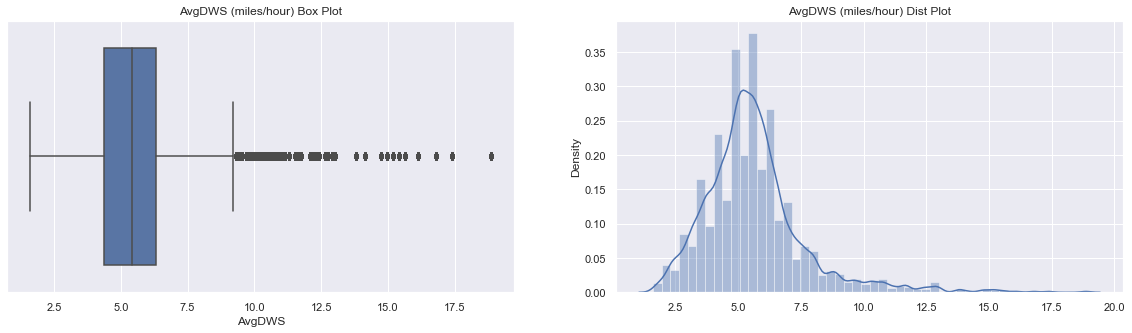

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=False)
# fig.suptitle('Box & Distribution Plots')

# Box Plot
sns.boxplot(ax=axes[0], x = turkey_daily_climate.AvgDWS)
axes[0].set_title('AvgDWS (miles/hour) Box Plot')

# Distribution Plot
sns.distplot(ax=axes[1], x = turkey_daily_climate.AvgDWS)
axes[1].set_title('AvgDWS (miles/hour) Dist Plot')

plt.show()

In [55]:
turkey_daily_climate.AvgDWS.isnull().sum()

6185

*We will fill these missing values with the median of AvgDWS values of the cities.*

In [56]:
dict_AvgDWS = dict(turkey_daily_climate.groupby(['City']).AvgDWS.median())

In [57]:
for i in turkey_daily_climate[(turkey_daily_climate.AvgDWS.isnull() == True)].City:
    idx = turkey_daily_climate[(turkey_daily_climate.AvgDWS.isnull() == True)].City.index
    turkey_daily_climate.iloc[idx, 4] = dict_AvgDWS[i]

In [58]:
turkey_daily_climate.AvgDWS.isnull().sum()

0

**Visibility in miles**

In [59]:
# Check unique values.
turkey_daily_climate['Visibility in miles'].unique()

array([ 6.,  5.,  7.,  3.,  2.,  4.,  1., nan])

In [60]:
# Renaming the column.
turkey_daily_climate.rename(columns = {"Visibility in miles":"Visibility"}, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


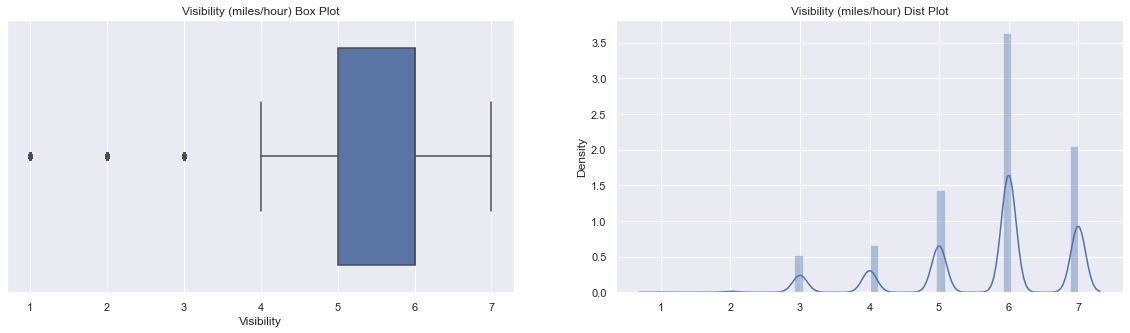

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=False)
# fig.suptitle('Box & Distribution Plots')

# Box Plot
sns.boxplot(ax=axes[0], x = turkey_daily_climate.Visibility)
axes[0].set_title('Visibility (miles/hour) Box Plot')

# Distribution Plot
sns.distplot(ax=axes[1], x = turkey_daily_climate.Visibility)
axes[1].set_title('Visibility (miles/hour) Dist Plot')

plt.show()

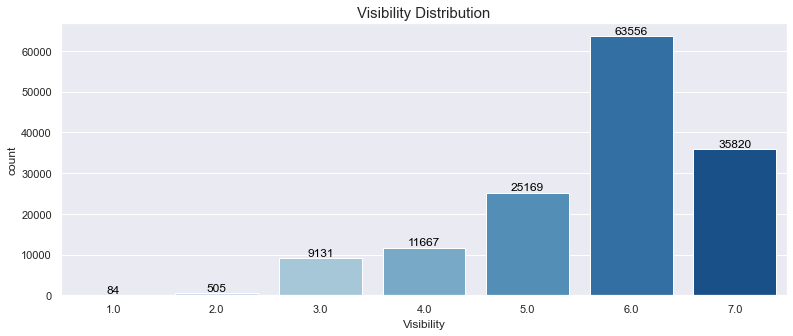

In [62]:
fig, axes = plt.subplots(figsize=(13, 5))
# Visibility Distribution
ax1 = sns.countplot(x=turkey_daily_climate.Visibility, palette="Blues")
ax1.set_title('Visibility Distribution', fontsize=15)
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+500), ha='center', va='baseline', color='black', size=12)

In [63]:
turkey_daily_climate.Visibility.isnull().sum()

6362

*We will fill these missing values with the mode of AvgDWS value.*

In [64]:
turkey_daily_climate["Visibility"].fillna(6, inplace = True)

In [65]:
turkey_daily_climate.Visibility.isnull().sum()

0

**Dew point, Fahrenheit / Celsius**

In [66]:
turkey_daily_climate['Dew point, Fahrenheit / Celsius']

0          47.8/8.8
1         53.2/11.8
2          42.8/6.0
3          35.5/1.9
4          43.8/6.6
            ...    
152289     39.9/4.4
152290     34.5/1.4
152291     42.9/6.1
152292     40.2/4.6
152293     42.3/5.7
Name: Dew point, Fahrenheit / Celsius, Length: 152294, dtype: object

*There are two Dew point values which is Fahrenheit and Celsius. We will select Celsius and delete the Fahrenheit.*

In [67]:
turkey_daily_climate['DewPntCel'] = turkey_daily_climate['Dew point, Fahrenheit / Celsius'].str.split('/').str[1]
turkey_daily_climate[['Dew point, Fahrenheit / Celsius', 'DewPntCel']].sample(3)

,"Dew point, Fahrenheit / Celsius",DewPntCel
55013,31.4/-0.3,-0.3
46688,67.8/19.9,19.9
77387,30.5/-0.8,-0.8


In [68]:
# Dropping 'Dew point, Fahrenheit / Celsius' column
turkey_daily_climate.drop(columns = ['Dew point, Fahrenheit / Celsius'], inplace = True)
turkey_daily_climate['DewPntCel'] = turkey_daily_climate['DewPntCel'].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


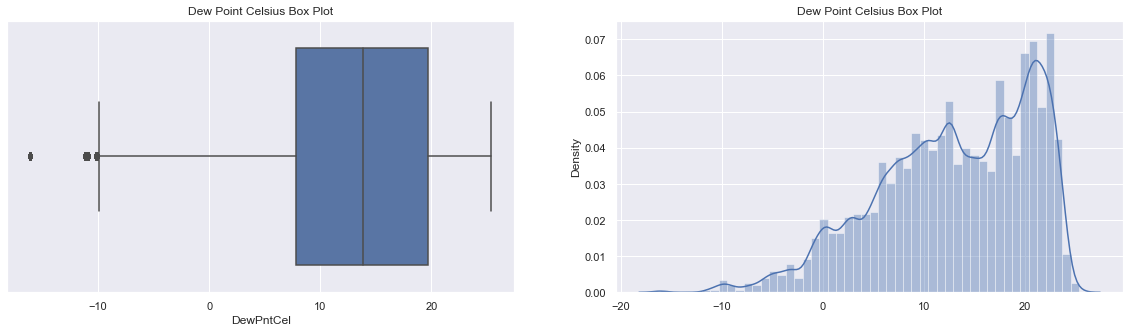

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=False)
# fig.suptitle('Box & Distribution Plots')

# Box Plot
sns.boxplot(ax=axes[0], x = turkey_daily_climate.DewPntCel)
axes[0].set_title('Dew Point Celsius Box Plot')

# Distribution Plot
sns.distplot(ax=axes[1], x = turkey_daily_climate.DewPntCel)
axes[1].set_title('Dew Point Celsius Box Plot')

plt.show()

**Maximum sustained wind speed (miles/hour)**

In [70]:
turkey_daily_climate['Maximum sustained wind speed (miles/hour)']

0         10.24
1         16.11
2         16.11
3         10.24
4         11.39
          ...  
152289    17.26
152290    16.11
152291    11.39
152292    11.39
152293     9.21
Name: Maximum sustained wind speed (miles/hour), Length: 152294, dtype: float64

In [71]:
# Renaming the column.
turkey_daily_climate.rename(columns = {"Maximum sustained wind speed (miles/hour)":"MaxSusWS"}, inplace = True)
turkey_daily_climate.head(1)

,City,Year,Month,Day,AvgDWS,Visibility,MaxSusWS,Maximum wind gust reported for the day,Weather type,Date,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm,DewPntCel
0,Adana,2010,01,01,3.8,6.0,10.24,NaN,NaN,2010-01-01,13.9,19.0,7.0,0.0,8.8


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


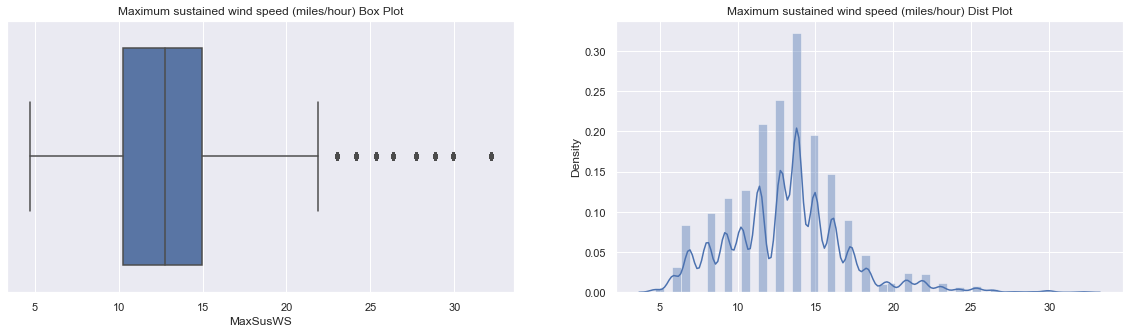

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=False)
# fig.suptitle('Box & Distribution Plots')

# Box Plot
sns.boxplot(ax=axes[0], x = turkey_daily_climate.MaxSusWS)
axes[0].set_title('Maximum sustained wind speed (miles/hour) Box Plot')

# Distribution Plot
sns.distplot(ax=axes[1], x = turkey_daily_climate.MaxSusWS)
axes[1].set_title('Maximum sustained wind speed (miles/hour) Dist Plot')

plt.show()

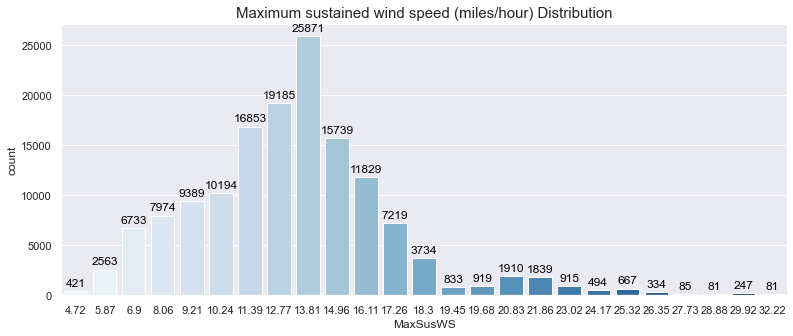

In [73]:
fig, axes = plt.subplots(figsize=(13, 5))
# Visibility Distribution
ax1 = sns.countplot(x=turkey_daily_climate.MaxSusWS, palette="Blues")
ax1.set_title('Maximum sustained wind speed (miles/hour) Distribution', fontsize=15)
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+500), ha='center', va='baseline', color='black', size=12)

In [74]:
turkey_daily_climate.MaxSusWS.isnull().sum()

6185

In [75]:
turkey_daily_climate.groupby(['City']).median()

,Year,AvgDWS,Visibility,MaxSusWS,Maximum wind gust reported for the day,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm,DewPntCel
City,,,,,,,,,,
Adana,2012.5,5.41,6.0,13.81,29.92,22.3,28.60,17.0,0.0,14.4
Adiyaman,2012.5,5.41,6.0,12.77,29.92,21.0,28.00,15.7,0.0,12.9
Afyonkarahisar,2012.5,5.41,6.0,13.81,28.88,23.2,29.00,17.8,0.0,15.1
Agri,2012.5,5.41,6.0,13.81,29.92,21.3,28.00,16.0,0.0,13.0
Amasya,2012.5,5.41,6.0,12.77,29.92,22.1,28.30,16.0,0.0,13.7
...,...,...,...,...,...,...,...,...,...,...
Tunceli,2012.5,5.41,6.0,13.81,28.88,23.1,29.00,17.3,0.0,14.8
Usak,2012.5,5.41,6.0,13.81,29.40,21.9,28.00,16.0,0.0,13.7
Van,2012.5,5.41,6.0,12.77,28.88,21.4,28.00,16.0,0.0,13.1


*We will fill these missing values with the median of MaxSusWS values of the cities.*

In [76]:
turkey_daily_climate.groupby(['City']).MaxSusWS.median().value_counts()

12.77    38
13.81    31
Name: MaxSusWS, dtype: int64

In [77]:
dict_MaxSusWS = dict(turkey_daily_climate[(turkey_daily_climate.MaxSusWS.isnull() == False)].groupby('City').MaxSusWS.median())

In [78]:
for i in turkey_daily_climate[(turkey_daily_climate.MaxSusWS.isnull() == True)].City:
    idx = turkey_daily_climate[(turkey_daily_climate.MaxSusWS.isnull() == True)].City.index
    turkey_daily_climate.iloc[idx, 6] = dict_MaxSusWS[i]

In [79]:
turkey_daily_climate.MaxSusWS.isnull().sum()

0

**Maximum wind gust reported for the day**

In [80]:
# Check unique values
turkey_daily_climate['Maximum wind gust reported for the day'].unique()


array([  nan, 33.26, 28.88, 37.98, 31.07, 21.86, 20.83, 25.32, 29.92,
       39.13, 34.41, 41.31, 42.46, 32.22, 23.02, 24.17, 18.3 , 52.94,
       36.94, 43.84, 19.68, 27.73, 35.79, 16.11, 40.28, 26.35, 17.26])

In [81]:
# Renaming the column.
turkey_daily_climate.rename(columns = {"Maximum wind gust reported for the day":"MaxWG"}, inplace = True)
turkey_daily_climate.head(1)

,City,Year,Month,Day,AvgDWS,Visibility,MaxSusWS,MaxWG,Weather type,Date,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm,DewPntCel
0,Adana,2010,01,01,3.8,6.0,10.24,NaN,NaN,2010-01-01,13.9,19.0,7.0,0.0,8.8


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


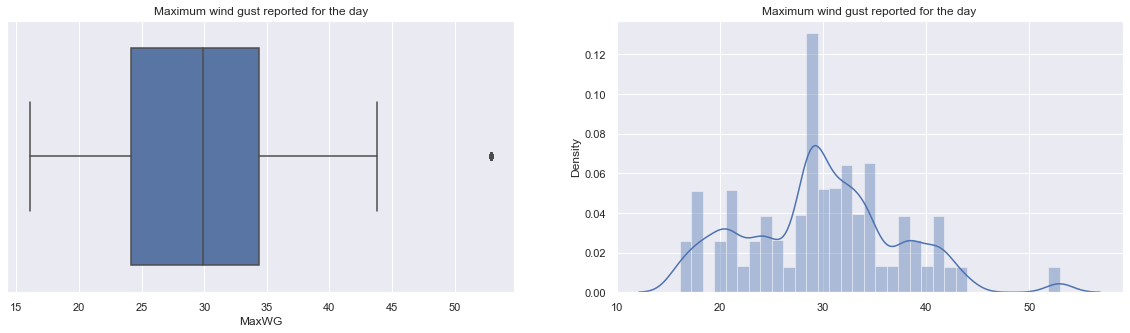

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=False)
# fig.suptitle('Box & Distribution Plots')

# Box Plot
sns.boxplot(ax=axes[0], x = turkey_daily_climate.MaxWG)
axes[0].set_title('Maximum wind gust reported for the day')

# Distribution Plot
sns.distplot(ax=axes[1], x = turkey_daily_climate.MaxWG)
axes[1].set_title('Maximum wind gust reported for the day')

plt.show()

In [83]:
turkey_daily_climate.groupby(['City']).median()

,Year,AvgDWS,Visibility,MaxSusWS,MaxWG,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm,DewPntCel
City,,,,,,,,,,
Adana,2012.5,5.41,6.0,13.81,29.92,22.3,28.60,17.0,0.0,14.4
Adiyaman,2012.5,5.41,6.0,12.77,29.92,21.0,28.00,15.7,0.0,12.9
Afyonkarahisar,2012.5,5.41,6.0,13.81,28.88,23.2,29.00,17.8,0.0,15.1
Agri,2012.5,5.41,6.0,13.81,29.92,21.3,28.00,16.0,0.0,13.0
Amasya,2012.5,5.41,6.0,13.81,29.92,22.1,28.30,16.0,0.0,13.7
...,...,...,...,...,...,...,...,...,...,...
Tunceli,2012.5,5.41,6.0,13.81,28.88,23.1,29.00,17.3,0.0,14.8
Usak,2012.5,5.41,6.0,13.81,29.40,21.9,28.00,16.0,0.0,13.7
Van,2012.5,5.41,6.0,13.81,28.88,21.4,28.00,16.0,0.0,13.1


*We will fill these missing values with the median of MaxWG values of the cities.*

In [84]:
turkey_daily_climate.groupby(['City']).MaxWG.median().value_counts()

29.92    40
28.88    21
29.40     8
Name: MaxWG, dtype: int64

In [85]:
dict_MaxWG = dict(turkey_daily_climate[(turkey_daily_climate.MaxWG.isnull() == False)].groupby('City').MaxWG.median())

In [86]:
for i in turkey_daily_climate[(turkey_daily_climate.MaxWG.isnull() == True)].City:
    idx = turkey_daily_climate[(turkey_daily_climate.MaxWG.isnull() == True)].City.index
    turkey_daily_climate.iloc[idx, 7] = dict_MaxWG[i]

turkey_daily_climate.MaxWG.isnull().sum()

0

**Weather Type**

In [87]:
# Check the unique values.
turkey_daily_climate['Weather type'].unique()

array([nan, 'Rain/Drizzle', 'Rain/Drizzle, Thunder', 'Fog',
       'Fog, Rain/Drizzle, Thunder', 'Fog, Rain/Drizzle', 'Thunder',
       'Rain/Drizzle, Hail, Thunder',
       'Rain/Drizzle, Snow, Thunder, Tornado'], dtype=object)

In [88]:
# Rename the column
turkey_daily_climate.rename(columns = {"Weather type":"WeatherType"}, inplace = True)

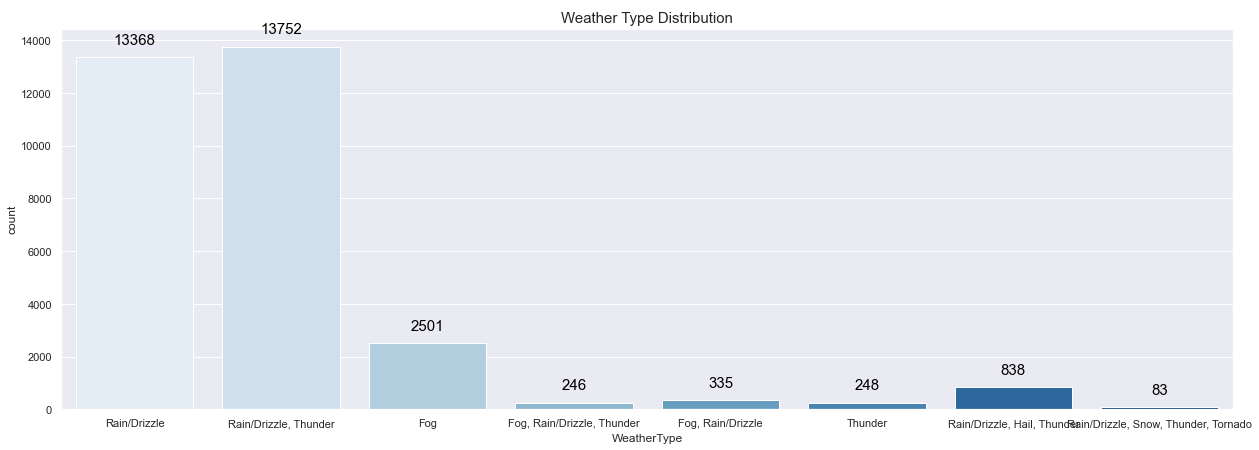

In [89]:
fig, axes = plt.subplots(figsize=(21, 7))
# Visibility Distribution
ax1 = sns.countplot(x=turkey_daily_climate.WeatherType, palette="Blues")
ax1.set_title('Weather Type Distribution', fontsize=15)
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+500), ha='center', va='baseline', color='black', size=15)

In [90]:
abc = pd.DataFrame(turkey_daily_climate.groupby(['City']).WeatherType.value_counts())
abc

WeatherType
City      WeatherType                                      
Adana     Rain/Drizzle, Thunder                         196
          Rain/Drizzle                                  191
          Fog                                            31
          Rain/Drizzle, Hail, Thunder                    11
          Fog, Rain/Drizzle                               4
...                                                     ...
Zonguldak Rain/Drizzle, Hail, Thunder                    10
          Fog, Rain/Drizzle                               5
          Thunder                                         5
          Fog, Rain/Drizzle, Thunder                      4
          Rain/Drizzle, Snow, Thunder, Tornado            1

[552 rows x 1 columns]

*We will fill these missing values with the mode of WeatherType values of the cities.*

In [91]:
for i in turkey_daily_climate[turkey_daily_climate.WeatherType.isnull() == True].City:
    idx = turkey_daily_climate[turkey_daily_climate.WeatherType.isnull() == True].City.index
    turkey_daily_climate.iloc[idx,8] = abc.loc[i][:1].index.tolist()[0]

turkey_daily_climate.WeatherType.isnull().sum()

0

## Fire Dataset Integration

**The df_2010_2015.csv was obtained by using Kaggle modis datasets and geopy module(to insert province).**

In [92]:
df_2010_2015 = pd.read_csv("df_2010_2015.csv")

In [93]:
df_2010_2015.head(1)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,province,elevation
0,39.1908,31.1941,307.8,1.6,1.2,2010-01-01,915,Terra,MODIS,66,6.2,286.1,17.7,D,0,Afyonkarahisar,943


In [94]:
turkey_daily_climate.City.unique()

array(['Adana', 'Adiyaman', 'Afyonkarahisar', 'Agri', 'Amasya', 'Ankara',
       'Antalya', 'Artvin', 'Aydin', 'Balikesir', 'Bilecik', 'Bingol',
       'Bolu', 'Burdur', 'Bursa', 'Canakkale', 'Cankiri', 'Corum',
       'Denizli', 'Diyarbakir', 'Edirne', 'Elazig', 'Erzincan', 'Erzurum',
       'Eskisehir', 'Gap', 'Sanliurfa', 'Giresun', 'Gumushane', 'Hakkari',
       'Hatay', 'Isparta', 'Istanbul', 'Mersin', 'Izmir', 'Kars',
       'Kastamonu', 'Kayseri', 'Kirklareli', 'Kirsehir', 'Kocaeli',
       'Konya', 'Kutahya', 'Malatya', 'Manisa', 'Kahramanmaras', 'Mardin',
       'Mugla', 'Mus', 'Nevsehir', 'Nigde', 'Ordu', 'Rize', 'Sakarya',
       'Samsun', 'Siirt', 'Sinop', 'Sivas', 'Tekirdag', 'Tokat',
       'Trabzon', 'Tunceli', 'Usak', 'Van', 'Yozgat', 'Zonguldak',
       'Bayburt', 'Kirikkale', 'Batman'], dtype=object)

In [95]:
# Check unique values
len(turkey_daily_climate.City.unique())

69

In [96]:
# Rename the cities in order to combine two datasets
city_map = {"City" : {'Adiyaman':'Adıyaman', 'Agri':'Ağrı', 'Aydin':'Aydın', 'Balikesir':'Balıkesir', 'Bingol':'Bingöl', 'Canakkale':'Çanakkale', 'Cankiri':'Çankırı', 'Corum':'Çorum', 'Diyarbakir':'Diyarbakır', 'Elazig':'Elâzığ', 'Eskisehir':'Eskişehir', 'Sanliurfa':'Şanlıurfa', 'Gumushane':'Gümüşhane', 'Hakkari':'Hakkâri', 'Istanbul':'İstanbul', 'Izmir':'İzmir', 'Kirklareli':'Kırklareli', 'Kirsehir':'Kırşehir', 'Kutahya':'Kütahya', 'Kahramanmaras':'Kahramanmaraş', 'Mugla':'Muğla', 'Mus':'Muş', 'Nevsehir':'Nevşehir', 'Nigde':'Niğde', 'Tekirdag':'Tekirdağ', 'Usak':'Uşak', 'Kirikkale':'Kırıkkale'}}

In [97]:
turkey_daily_climate = turkey_daily_climate.replace(city_map)

*We will add a Fire column using city and date informations.*

In [98]:
list_ = []
for i,j in zip(df_2010_2015.acq_date, df_2010_2015.province):
    list_.append((i,j))

In [99]:
unique = list(set(list_))

In [100]:
# Add a Fire column to dataset
turkey_daily_climate['Fire'] = 0

*If Date and City is same for two datesets, then Fire = 1*

In [101]:
for i,j in zip(turkey_daily_climate.Date, turkey_daily_climate.City):
    for k in unique:
        if  (i == k[0]) and (j == k[1]):
            idx = turkey_daily_climate[(turkey_daily_climate.Date == i)&(turkey_daily_climate.City == j)].index
            turkey_daily_climate.iloc[idx, 15] = 1

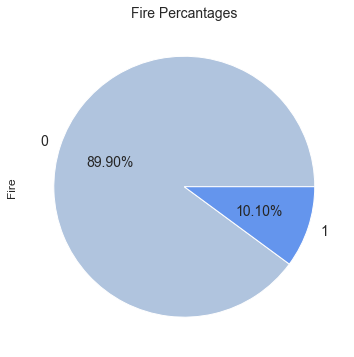

In [102]:
colors = ['lightsteelblue','cornflowerblue']
ax = turkey_daily_climate.Fire.value_counts().plot.pie(autopct='%1.2f%%', figsize=(6, 6),fontsize=14, colors=colors)
ax.set_title('Fire Percantages', fontsize = 14)
plt.show()

In [103]:
# Sorting the values by Date column
df = turkey_daily_climate.sort_values(by = 'Date')

In [104]:
turkey_daily_climate.set_index(['Date'], inplace = True)

In [105]:
turkey_daily_climate

,City,Year,Month,Day,AvgDWS,Visibility,MaxSusWS,MaxWG,WeatherType,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm,DewPntCel,Fire
Date,,,,,,,,,,,,,,,
2010-01-01,Adana,2010,01,01,3.80,6.0,10.24,29.92,"Rain/Drizzle, Thunder",13.9,19.0,7.0,0.00,8.8,0
2010-01-02,Adana,2010,01,02,4.60,6.0,16.11,29.92,Rain/Drizzle,15.1,19.0,11.0,0.03,11.8,0
2010-01-03,Adana,2010,01,03,7.25,5.0,16.11,29.92,Rain/Drizzle,15.9,20.0,12.0,0.03,6.0,0
2010-01-04,Adana,2010,01,04,5.52,6.0,10.24,29.92,"Rain/Drizzle, Thunder",14.1,19.0,8.0,0.00,1.9,0
2010-01-05,Adana,2010,01,05,5.06,6.0,11.39,29.92,Rain/Drizzle,12.8,15.0,11.0,0.03,6.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-27,Batman,2015,02,27,6.44,6.0,17.26,29.92,Rain/Drizzle,12.7,18.4,8.0,0.23,4.4,0
2015-02-28,Batman,2015,02,28,7.83,6.0,16.11,19.68,"Rain/Drizzle, Thunder",14.7,20.3,8.1,0.00,1.4,0
2015-02-29,Batman,2015,02,29,4.83,6.0,11.39,29.92,"Rain/Drizzle, Thunder",16.3,23.7,8.4,0.00,6.1,0


In [106]:
X = turkey_daily_climate.drop(columns = 'Fire')
y = turkey_daily_climate.Fire

In [107]:
turkey_daily_climate.to_csv('fire_data_turkey.csv')

## EDA

In [108]:
quarter_dict = {'01': 'Q1', '02': 'Q1', '03': 'Q2', '04': 'Q2', '05': 'Q2', '06': 'Q3', '07': 'Q3', '08': 'Q3', '09': 'Q4', '10': 'Q4', '11': 'Q4', '12': 'Q1' }

q = []
for i in turkey_daily_climate['Month'].to_list():
  q.append(quarter_dict.get(str(i)))

turkey_daily_climate['Quarter'] = q

In [109]:
turkey_daily_climate

,City,Year,Month,Day,AvgDWS,Visibility,MaxSusWS,MaxWG,WeatherType,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm,DewPntCel,Fire,Quarter
Date,,,,,,,,,,,,,,,,
2010-01-01,Adana,2010,01,01,3.80,6.0,10.24,29.92,"Rain/Drizzle, Thunder",13.9,19.0,7.0,0.00,8.8,0,Q1
2010-01-02,Adana,2010,01,02,4.60,6.0,16.11,29.92,Rain/Drizzle,15.1,19.0,11.0,0.03,11.8,0,Q1
2010-01-03,Adana,2010,01,03,7.25,5.0,16.11,29.92,Rain/Drizzle,15.9,20.0,12.0,0.03,6.0,0,Q1
2010-01-04,Adana,2010,01,04,5.52,6.0,10.24,29.92,"Rain/Drizzle, Thunder",14.1,19.0,8.0,0.00,1.9,0,Q1
2010-01-05,Adana,2010,01,05,5.06,6.0,11.39,29.92,Rain/Drizzle,12.8,15.0,11.0,0.03,6.6,0,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-27,Batman,2015,02,27,6.44,6.0,17.26,29.92,Rain/Drizzle,12.7,18.4,8.0,0.23,4.4,0,Q1
2015-02-28,Batman,2015,02,28,7.83,6.0,16.11,19.68,"Rain/Drizzle, Thunder",14.7,20.3,8.1,0.00,1.4,0,Q1
2015-02-29,Batman,2015,02,29,4.83,6.0,11.39,29.92,"Rain/Drizzle, Thunder",16.3,23.7,8.4,0.00,6.1,0,Q1


In [110]:
turkey_daily_climate.corr()

,Year,AvgDWS,Visibility,MaxSusWS,MaxWG,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm,DewPntCel,Fire
Year,1.000000,0.001836,-0.000953,0.001581,-0.000171,0.000901,0.000338,0.001375,-0.000191,0.001180,-0.021016
AvgDWS,0.001836,1.000000,0.161388,0.802111,0.214764,-0.008928,-0.147678,0.082445,0.086190,-0.073889,-0.002616
Visibility,-0.000953,0.161388,1.000000,0.213721,-0.012208,0.393674,0.355323,0.379171,-0.089313,0.289503,-0.000391
MaxSusWS,0.001581,0.802111,0.213721,1.000000,0.232517,0.169857,0.058824,0.240715,0.133393,0.138021,-0.001622
MaxWG,-0.000171,0.214764,-0.012208,0.232517,1.000000,-0.076691,-0.084856,-0.060398,0.086650,-0.073842,-0.000890
TempAvgCel,0.000901,-0.008928,0.393674,0.169857,-0.076691,1.000000,0.961674,0.961233,-0.094815,0.860439,-0.002254
TempMaxCel,0.000338,-0.147678,0.355323,0.058824,-0.084856,0.961674,1.000000,0.864036,-0.125249,0.756004,-0.000373
TempMinCel,0.001375,0.082445,0.379171,0.240715,-0.060398,0.961233,0.864036,1.000000,-0.049261,0.920855,-0.004197
PrecipitationCm,-0.000191,0.086190,-0.089313,0.133393,0.086650,-0.094815,-0.125249,-0.049261,1.000000,-0.000188,0.001479
DewPntCel,0.001180,-0.073889,0.289503,0.138021,-0.073842,0.860439,0.756004,0.920855,-0.000188,1.000000,-0.005851


In [111]:
turkey_daily_climate.corr()["Fire"].sort_values()

Year              -0.021016
DewPntCel         -0.005851
TempMinCel        -0.004197
AvgDWS            -0.002616
TempAvgCel        -0.002254
MaxSusWS          -0.001622
MaxWG             -0.000890
Visibility        -0.000391
TempMaxCel        -0.000373
PrecipitationCm    0.001479
Fire               1.000000
Name: Fire, dtype: float64

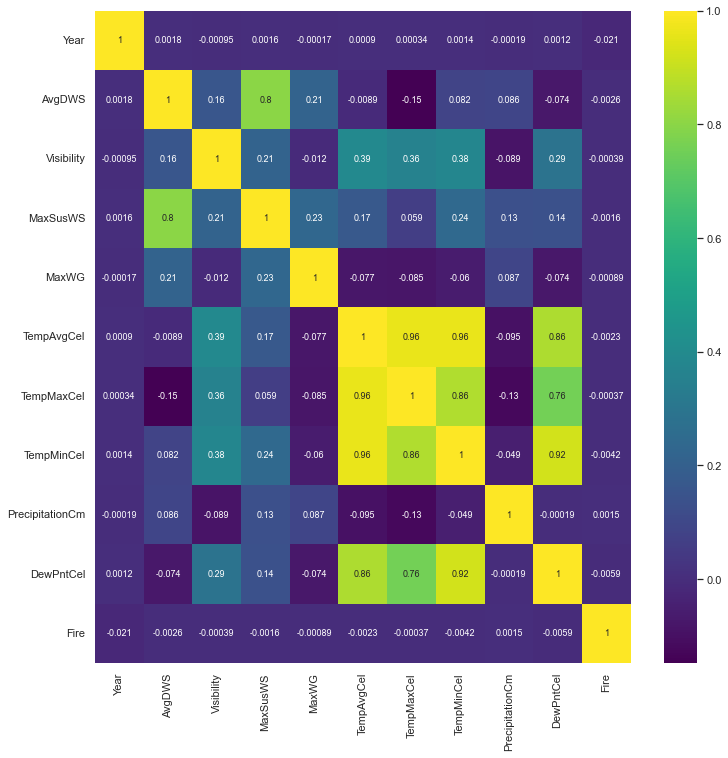

In [112]:
plt.figure(figsize=(12,12))
sns.heatmap(turkey_daily_climate.corr(),annot=True,cmap="viridis", annot_kws={"size": 9})
plt.show()

## Model selection & Training

In [113]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPRegressor, MLPClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings(action='ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
le = LabelEncoder()
label = le.fit_transform(turkey_daily_climate['WeatherType'])
turkey_daily_climate.drop("WeatherType", axis=1, inplace=True)
turkey_daily_climate["WeatherType"] = label

label = le.fit_transform(turkey_daily_climate['City'])
turkey_daily_climate.drop("City", axis=1, inplace=True)
turkey_daily_climate["City"] = label

label = le.fit_transform(turkey_daily_climate['Quarter'])
turkey_daily_climate.drop("Quarter", axis=1, inplace=True)
turkey_daily_climate["Quarter"] = label

In [115]:
turkey_daily_climate.head()

,Year,Month,Day,AvgDWS,Visibility,MaxSusWS,MaxWG,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm,DewPntCel,Fire,WeatherType,City,Quarter
Date,,,,,,,,,,,,,,,,
2010-01-01,2010,01,01,3.80,6.0,10.24,29.92,13.9,19.0,7.0,0.00,8.8,0,6,0,0
2010-01-02,2010,01,02,4.60,6.0,16.11,29.92,15.1,19.0,11.0,0.03,11.8,0,3,0,0
2010-01-03,2010,01,03,7.25,5.0,16.11,29.92,15.9,20.0,12.0,0.03,6.0,0,3,0,0
2010-01-04,2010,01,04,5.52,6.0,10.24,29.92,14.1,19.0,8.0,0.00,1.9,0,6,0,0
2010-01-05,2010,01,05,5.06,6.0,11.39,29.92,12.8,15.0,11.0,0.03,6.6,0,3,0,0


In [116]:
cols = ['City',
 'Year',
 'Month',
 'Day',
 'AvgDWS',
 'Visibility',
 'MaxSusWS',
 'MaxWG',
 'WeatherType',
 'TempAvgCel',
 'TempMaxCel',
 'TempMinCel',
 'PrecipitationCm',
 'DewPntCel',
 'Quarter',
 'Fire'
 ]
turkey_daily_climate = turkey_daily_climate[cols]
turkey_daily_climate.head(1)

,City,Year,Month,Day,AvgDWS,Visibility,MaxSusWS,MaxWG,WeatherType,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm,DewPntCel,Quarter,Fire
Date,,,,,,,,,,,,,,,,
2010-01-01,0,2010,01,01,3.8,6.0,10.24,29.92,6,13.9,19.0,7.0,0.0,8.8,0,0


In [117]:
turkey_daily_climate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152294 entries, 2010-01-01 to 2015-02-31
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   City             152294 non-null  int32  
 1   Year             152294 non-null  int64  
 2   Month            152294 non-null  object 
 3   Day              152294 non-null  object 
 4   AvgDWS           152294 non-null  float64
 5   Visibility       152294 non-null  float64
 6   MaxSusWS         152294 non-null  float64
 7   MaxWG            152294 non-null  float64
 8   WeatherType      152294 non-null  int32  
 9   TempAvgCel       152294 non-null  float64
 10  TempMaxCel       152294 non-null  float64
 11  TempMinCel       152294 non-null  float64
 12  PrecipitationCm  152294 non-null  float64
 13  DewPntCel        152294 non-null  float64
 14  Quarter          152294 non-null  int32  
 15  Fire             152294 non-null  int64  
dtypes: float64(9), int32(3), int64

In [118]:
normalized_data_df = turkey_daily_climate.reset_index()
normalized_data_df

,Date,City,Year,Month,Day,AvgDWS,Visibility,MaxSusWS,MaxWG,WeatherType,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm,DewPntCel,Quarter,Fire
0,2010-01-01,0,2010,01,01,3.80,6.0,10.24,29.92,6,13.9,19.0,7.0,0.00,8.8,0,0
1,2010-01-02,0,2010,01,02,4.60,6.0,16.11,29.92,3,15.1,19.0,11.0,0.03,11.8,0,0
2,2010-01-03,0,2010,01,03,7.25,5.0,16.11,29.92,3,15.9,20.0,12.0,0.03,6.0,0,0
3,2010-01-04,0,2010,01,04,5.52,6.0,10.24,29.92,6,14.1,19.0,8.0,0.00,1.9,0,0
4,2010-01-05,0,2010,01,05,5.06,6.0,11.39,29.92,3,12.8,15.0,11.0,0.03,6.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152289,2015-02-27,10,2015,02,27,6.44,6.0,17.26,29.92,3,12.7,18.4,8.0,0.23,4.4,0,0
152290,2015-02-28,10,2015,02,28,7.83,6.0,16.11,19.68,6,14.7,20.3,8.1,0.00,1.4,0,0
152291,2015-02-29,10,2015,02,29,4.83,6.0,11.39,29.92,6,16.3,23.7,8.4,0.00,6.1,0,0
152292,2015-02-30,10,2015,02,30,5.64,6.0,11.39,29.92,6,19.3,27.0,10.0,0.00,4.6,0,0


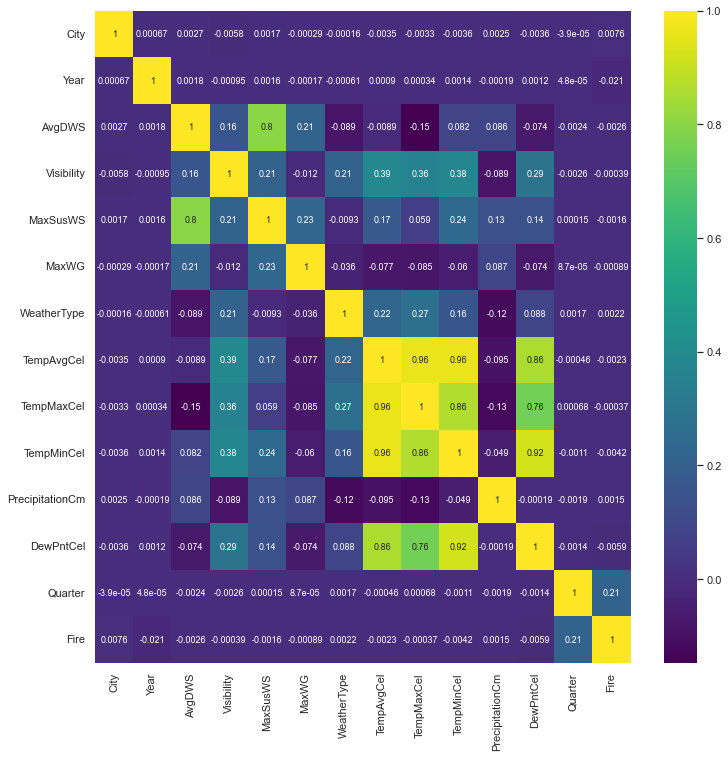

In [119]:
plt.figure(figsize=(12,12))
sns.heatmap(turkey_daily_climate.corr(),annot=True,cmap="viridis", annot_kws={"size": 9})
plt.show()

In [120]:
# To avoid multicollinearity
del normalized_data_df['Date'],  normalized_data_df['AvgDWS'], normalized_data_df['TempMaxCel'], normalized_data_df['TempMinCel'], normalized_data_df['DewPntCel']

In [121]:
normalized_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152294 entries, 0 to 152293
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   City             152294 non-null  int32  
 1   Year             152294 non-null  int64  
 2   Month            152294 non-null  object 
 3   Day              152294 non-null  object 
 4   Visibility       152294 non-null  float64
 5   MaxSusWS         152294 non-null  float64
 6   MaxWG            152294 non-null  float64
 7   WeatherType      152294 non-null  int32  
 8   TempAvgCel       152294 non-null  float64
 9   PrecipitationCm  152294 non-null  float64
 10  Quarter          152294 non-null  int32  
 11  Fire             152294 non-null  int64  
dtypes: float64(5), int32(3), int64(2), object(2)
memory usage: 12.2+ MB


In [122]:
normalized_data_df["Month"] = pd.to_numeric(normalized_data_df["Month"])
normalized_data_df["Day"] = pd.to_numeric(normalized_data_df["Day"])

In [123]:
normalized_data_df.value_counts(["Fire"])

Fire
0       136909
1        15385
dtype: int64

In [124]:
X = normalized_data_df.drop(columns = 'Fire')
y = normalized_data_df.Fire

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [125]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [126]:
models = ['LR', 'KNN', 'XGB', 'SVM', 'MLP']

In [127]:
acc = []

### **Logistic Regression**

Training accuracy: 0.9
Test accuracy: 0.897
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     40962
           1       0.00      0.00      0.00      4727

    accuracy                           0.90     45689
   macro avg       0.45      0.50      0.47     45689
weighted avg       0.80      0.90      0.85     45689



<AxesSubplot:>

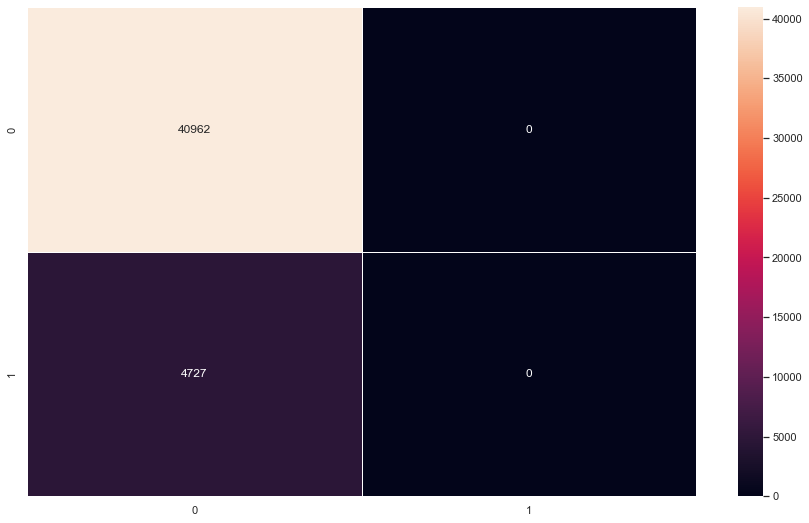

In [128]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print('Training accuracy:', lr.score(X_train, y_train).round(3))
acc.append(lr.score(X_train, y_train).round(3))
print('Test accuracy:', lr.score(X_test, y_test).round(3))
y_hat_rf = lr.predict(X_test)
print(classification_report(y_test, y_hat_rf))

cm = confusion_matrix(y_test, y_hat_rf)
plt.figure(figsize = (15,9))
sns.heatmap(cm, linewidths=1, annot=True, fmt='g')

*Logistic Regression is not appropriate to predict Fire*

### **KNN**

Training accuracy: 0.917
Test accuracy: 0.892
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     40962
           1       0.43      0.14      0.21      4727

    accuracy                           0.89     45689
   macro avg       0.67      0.56      0.57     45689
weighted avg       0.86      0.89      0.87     45689



<AxesSubplot:>

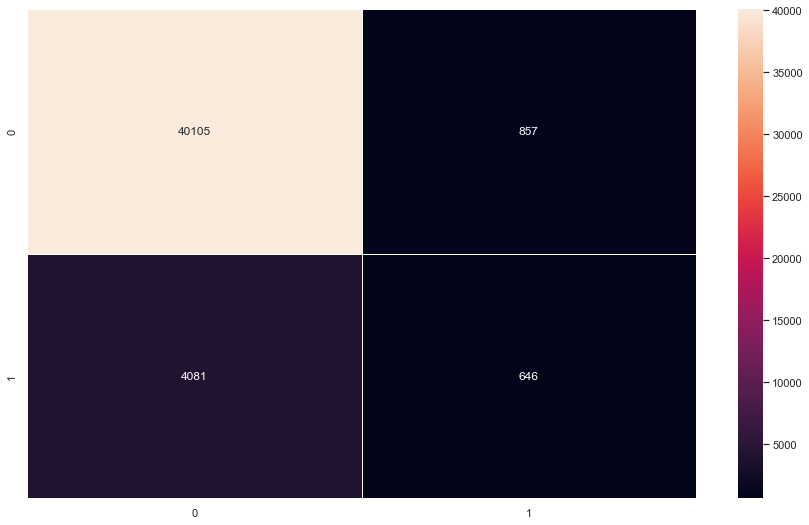

In [129]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Training accuracy:', knn.score(X_train, y_train).round(3))
acc.append(knn.score(X_train, y_train).round(3))
print('Test accuracy:', knn.score(X_test, y_test).round(3))
y_hat_rf = knn.predict(X_test)
print(classification_report(y_test, y_hat_rf))

cm = confusion_matrix(y_test, y_hat_rf)
plt.figure(figsize = (15,9))
sns.heatmap(cm, linewidths=1, annot=True, fmt='g')

### **XGBClassifier**

Training accuracy: 0.929
Test accuracy: 0.916
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     40962
           1       0.73      0.30      0.42      4727

    accuracy                           0.92     45689
   macro avg       0.83      0.64      0.69     45689
weighted avg       0.90      0.92      0.90     45689



<AxesSubplot:>

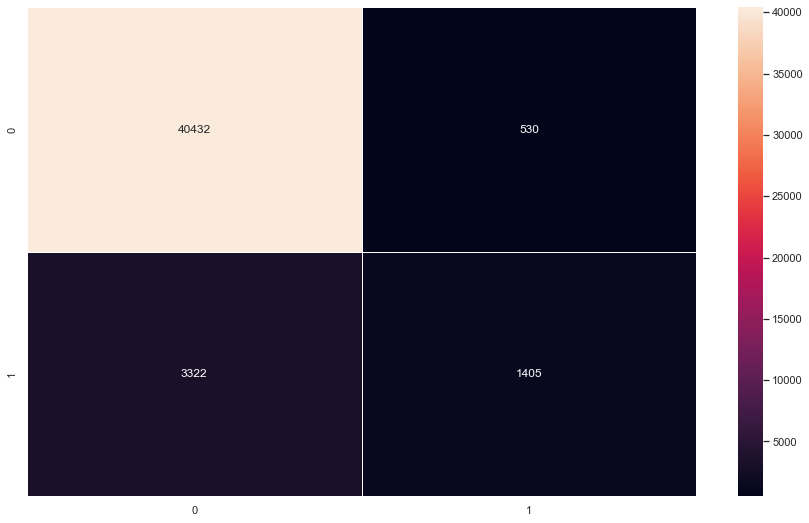

In [130]:
xgb = XGBClassifier().fit(X_train, y_train)

print('Training accuracy:', xgb.score(X_train, y_train).round(3))
acc.append(xgb.score(X_train, y_train).round(3))

print('Test accuracy:', xgb.score(X_test, y_test).round(3))
y_hat_rf = xgb.predict(X_test)
print(classification_report(y_test, y_hat_rf))

cm = confusion_matrix(y_test, y_hat_rf)
plt.figure(figsize = (15,9))
sns.heatmap(cm, linewidths=1, annot=True, fmt='g')

### Support Vector Machines

Training accuracy: 0.9
Test accuracy: 0.897
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     40962
           1       0.00      0.00      0.00      4727

    accuracy                           0.90     45689
   macro avg       0.45      0.50      0.47     45689
weighted avg       0.80      0.90      0.85     45689



<AxesSubplot:>

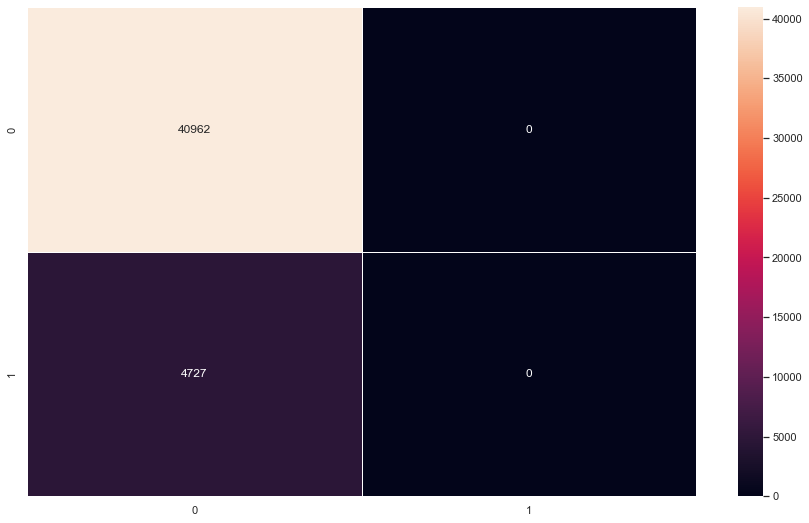

In [139]:
svc = SVC()
svc.fit(X_train, y_train)
print('Training accuracy:', svc.score(X_train, y_train).round(3))
acc.append(svc.score(X_train, y_train).round(3))

y_hat_rf = svc.predict(X_test)
print('Test accuracy:', svc.score(X_test, y_test).round(3))
y_hat_rf = svc.predict(X_test)
print(classification_report(y_test, y_hat_rf))

cm = confusion_matrix(y_test, y_hat_rf)
plt.figure(figsize = (15,9))
sns.heatmap(cm, linewidths=1, annot=True, fmt='g')

*SVM is not appropriate to predict Fire.*

### MLP

Training accuracy: 0.903
Test accuracy: 0.899
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     40962
           1       0.59      0.08      0.15      4727

    accuracy                           0.90     45689
   macro avg       0.75      0.54      0.55     45689
weighted avg       0.87      0.90      0.86     45689



<AxesSubplot:>

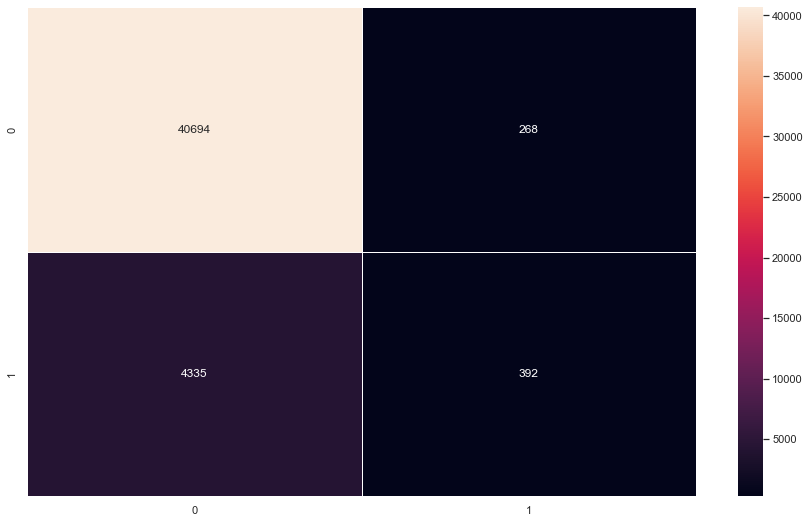

In [140]:
mlp = MLPClassifier(hidden_layer_sizes=(16,16))
mlp.fit(X_train, y_train)

print('Training accuracy:', mlp.score(X_train, y_train).round(3))
acc.append(mlp.score(X_train, y_train).round(3))

print('Test accuracy:', mlp.score(X_test, y_test).round(3))
y_hat_rf = mlp.predict(X_test)
print(classification_report(y_test, y_hat_rf))

cm = confusion_matrix(y_test, y_hat_rf)
plt.figure(figsize = (15,9))
sns.heatmap(cm, linewidths=1, annot=True, fmt='g')

In [141]:
dct = dict(zip(models, acc))
dct = dict(sorted(dct.items(), key=lambda x: x[1], reverse=True))
dct

{'XGB': 0.929, 'KNN': 0.917, 'MLP': 0.903, 'LR': 0.9, 'SVM': 0.9}

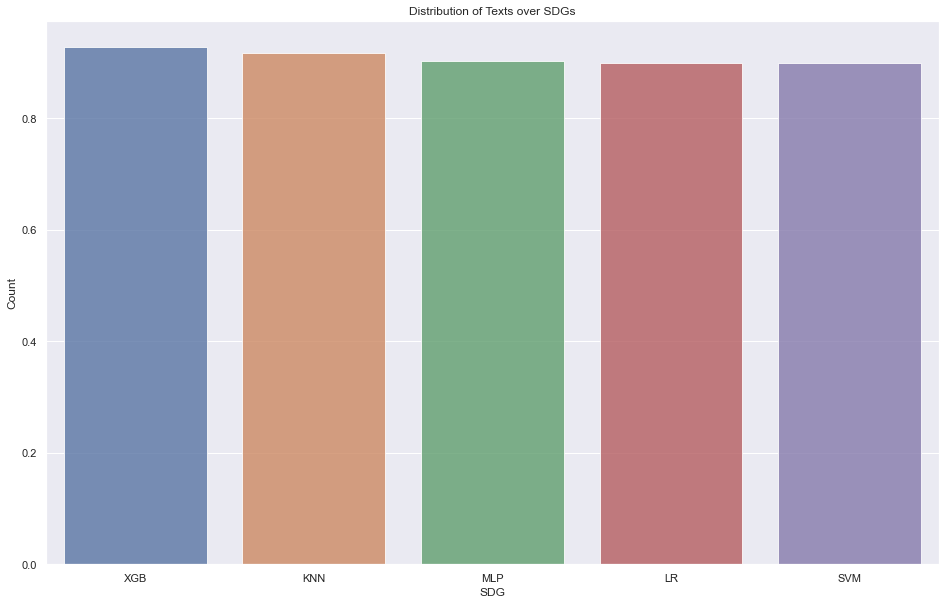

In [142]:
# total_number_of_excerpts  = df_osdg['sdg'].value_counts()


plt.figure(figsize=(16,10))
ax = sns.barplot(list(dct.keys()), list(dct.values()), alpha=0.8)

plt.title('Distribution of Texts over SDGs')
plt.xlabel('SDG', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

### Grid Search for XGBoost Classifier

In [164]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

param_grid = [{'min_child_weight': np.arange(0.1, 10.1, 0.1)}] #set of trial values for min_child_weight
i=1
kf = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
     model = GridSearchCV(XGBClassifier(), param_grid, cv=10, scoring= 'f1')
     model.fit(xtr, ytr)
     print (model.best_params_)
     pred=model.predict(xvl)
     print('accuracy_score',accuracy_score(yvl,pred))
     i+=1


1 of kfold 10
{'min_child_weight': 9.1}
accuracy_score 0.9181877872619829

2 of kfold 10
{'min_child_weight': 5.3}
accuracy_score 0.9176625082074852

3 of kfold 10
{'min_child_weight': 1.4000000000000001}
accuracy_score 0.9179251477347341

4 of kfold 10
{'min_child_weight': 5.9}
accuracy_score 0.9189100459619173

5 of kfold 10
{'min_child_weight': 7.1}
accuracy_score 0.9184450719022916

6 of kfold 10
{'min_child_weight': 2.1}
accuracy_score 0.9186420644822378

7 of kfold 10
{'min_child_weight': 5.3}
accuracy_score 0.9180510867423993

8 of kfold 10
{'min_child_weight': 5.3}
accuracy_score 0.9167378028760916

9 of kfold 10
{'min_child_weight': 6.7}
accuracy_score 0.9206119902816994

10 of kfold 10
{'min_child_weight': 8.0}
accuracy_score 0.9210716396349071


### Sample Approach

In [196]:
normalized_data_df.value_counts(["Fire"])

Fire
0       136909
1        15385
dtype: int64

In [414]:
s0 = normalized_data_df.Fire[normalized_data_df.Fire.eq(0)].sample(5111).index
s1 = normalized_data_df.Fire[normalized_data_df.Fire.eq(1)].sample(5111).index

master_dataset = normalized_data_df.loc[s0.union(s1)]

X_s = master_dataset.drop(columns = 'Fire')
y_s = master_dataset.Fire

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size = 0.3, random_state = 1)

In [415]:
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train_s)
X_test_s = ss.fit_transform(X_test_s)

Training accuracy: 0.926
Test accuracy: 0.784
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1487
           1       0.79      0.79      0.79      1580

    accuracy                           0.78      3067
   macro avg       0.78      0.78      0.78      3067
weighted avg       0.78      0.78      0.78      3067



<AxesSubplot:>

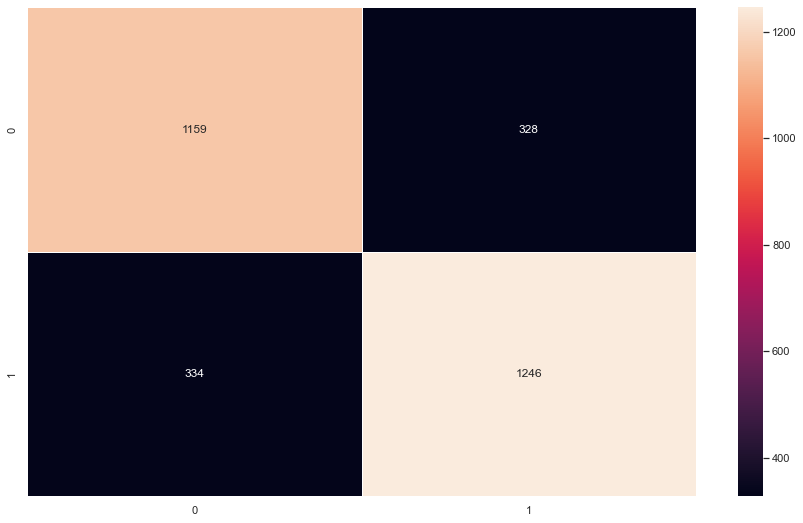

In [347]:
xgb = XGBClassifier().fit(X_train_s, y_train_s)

print('Training accuracy:', xgb.score(X_train_s, y_train_s).round(3))
acc.append(xgb.score(X_train_s, y_train_s).round(3))

print('Test accuracy:', xgb.score(X_test_s, y_test_s).round(3))
y_hat_rf_s = xgb.predict(X_test_s)
print(classification_report(y_test_s, y_hat_rf_s))

cm = confusion_matrix(y_test_s, y_hat_rf_s)
plt.figure(figsize = (15,9))
sns.heatmap(cm, linewidths=1, annot=True, fmt='g')